**Introduction**

Hyperparameters are the variables that govern the training process and the topology of an ML model. These variables remain constant over the training process and directly impact the performance of your ML program. Hyperparameters are of two types:

1. **Model hyperparameters** which influence model selection such as the number and width of hidden layers

2. **Algorithm hyperparameters** which influence the speed and quality of the learning algorithm such as the learning rate for Stochastic Gradient Descent (SGD) and the number of nearest neighbors for a k Nearest Neighbors (KNN) classifier

In [ ]:
# Installing keras tuner. 
!pip install -q -U keras-tuner

     |████████████████████████████████| 102kB 5.9MB/s 


In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import kerastuner as kt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import sys


**Data**

The Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels). Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images.

In [ ]:
# Accessing the images directly from TensorFlow.
fashion_mnist = keras.datasets.fashion_mnist
(train_img, train_labels), (test_img, test_labels) = fashion_mnist.load_data()

# or we can directly use --
#(img_train, label_train), (img_test, label_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# Normalizing pixel values between 0 and 1
train_img = train_img.astype('float32') / 255.0
test_img = test_img.astype('float32') / 255.0

This shows that 60k images are on the training dataset and 10k images are on the test dataset.

In [ ]:
len(train_img), len(test_img)

(60000, 10000)

Every image in the training and test dataset are represent as 28 * 28 pixels.

In [ ]:
train_img.shape , test_img.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
train_labels.shape, test_labels.shape

((60000,), (10000,))

In [ ]:
len(train_labels), len(test_labels)

(60000, 10000)

Each image is mapped to a single label and the class names are not included in the dataset, stroing them here for further usage.

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

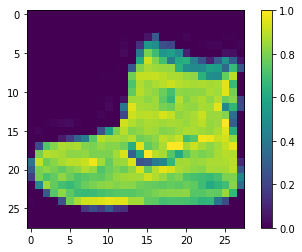

In [ ]:
plt.figure()
plt.imshow(train_img[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# image as scaled numpy array.
print(train_img[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

Let's display the first 20 images from the training dataset. Figure size is (15, 15) and the subplots are size of (5,5). 

<function matplotlib.pyplot.show>

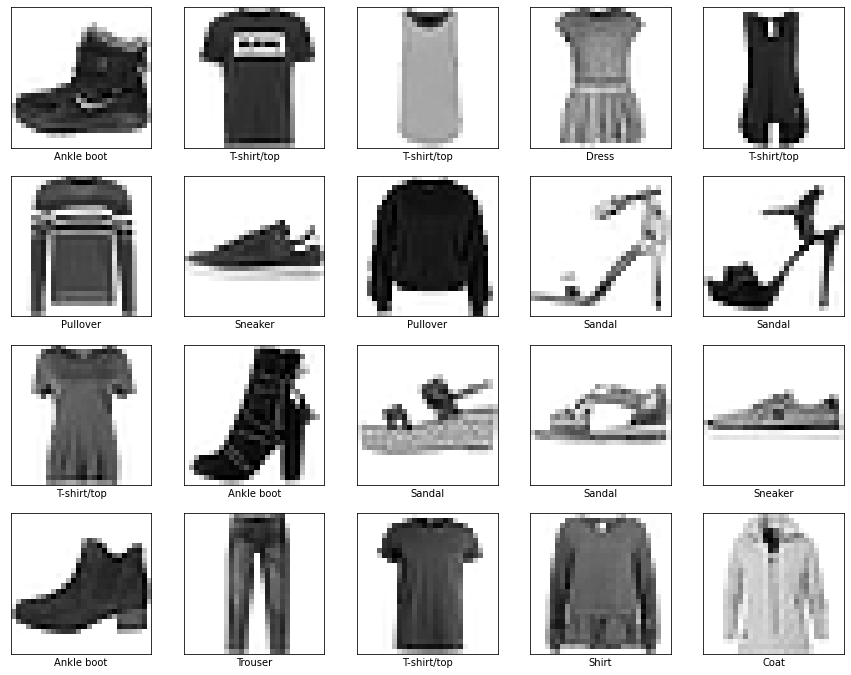

In [ ]:
plt.figure(figsize = (15,15))
for i in range(20):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show

# Build a new simple model to fit the data for classification. 

**MODEL-1**
1. Flatten the image .
2. Used ReLu as activation function, activity regularizer and bias regularizer as l1 regularisation.
3. Epochs is set to 15.

In [ ]:
#set random seed.
tf.random.set_seed(42)

model1 = tf.keras.Sequential(name = 'MODEL-1')
model1.add(tf.keras.layers.Flatten(input_shape = (28,28), name = 'input_layer' ))
model1.add(tf.keras.layers.Dense(50, activation='relu', bias_regularizer = 'l1', activity_regularizer = 'l1', name = 'layer1' ))
model1.add(tf.keras.layers.Dense(25, activation = 'relu',bias_regularizer = 'l1', activity_regularizer = 'l1', name = 'layer2'))
model1.add(tf.keras.layers.Dense(15, activation= 'relu', bias_regularizer = 'l1', activity_regularizer = 'l1', name = 'layer3'))
model1.add(tf.keras.layers.Dense(10, activation = 'relu', bias_regularizer = 'l1', activity_regularizer = 'l1', name = 'output_layer'))

# Used adam as a optimization function, sparse categorical cross entropy as loss function and accuracy as metrics 
model1.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = 'accuracy')

# Fit the model with training image and traning labels.
model1.fit(train_img, train_labels, epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1002 - accuracy: 0.7065
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8230 - accuracy: 0.7623
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7688 - accuracy: 0.7739
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7386 - accuracy: 0.7883
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6974 - accuracy: 0.8188
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6604 - accuracy: 0.8362
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6415 - accuracy: 0.8409
Epoch 8/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6278 - accuracy: 0.8446
Epoch 9/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6229 - accuracy: 0.8444
Epoch 10/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.612

In [ ]:
# Check the model summary.
model1.summary()

Model: "MODEL-1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
layer1 (Dense)               (None, 50)                39250     
_________________________________________________________________
layer2 (Dense)               (None, 25)                1275      
_________________________________________________________________
layer3 (Dense)               (None, 15)                390       
_________________________________________________________________
output_layer (Dense)         (None, 10)                160       
Total params: 41,075
Trainable params: 41,075
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluating the model on the test dataset.
test_loss, test_acc = model1.evaluate(test_img,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.6636 - accuracy: 0.8258

Test accuracy: 0.8258000016212463


Let's run the model for longer time.

In [ ]:
model1.fit(train_img, train_labels, epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5816 - accuracy: 0.8554
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5807 - accuracy: 0.8546
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5743 - accuracy: 0.8564
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5748 - accuracy: 0.8559
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5709 - accuracy: 0.8570
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5631 - accuracy: 0.8614
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5496 - accuracy: 0.8726
Epoch 8/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5379 - accuracy: 0.8760
Epoch 9/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5349 - accuracy: 0.8768
Epoch 10/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.528

In [ ]:
# Evaluating the model on the test dataset.
test_loss, test_acc = model1.evaluate(test_img,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.6297 - accuracy: 0.8488

Test accuracy: 0.848800003528595


**MODEL-2**

Using the same model but with activity regularizer and bias regularizer as l2 regularisation.

In [ ]:
# Set the seed.
tf.random.set_seed(42)

model2 = tf.keras.Sequential(name = 'MODEL-2')
model2.add(tf.keras.layers.Flatten(input_shape = (28,28), name = 'input_layer'))
model2.add(tf.keras.layers.Dense(50, activation='relu', bias_regularizer = 'l2', activity_regularizer = 'l2', name = 'layer1' ))
model2.add(tf.keras.layers.Dense(25, activation = 'relu',bias_regularizer = 'l2', activity_regularizer = 'l2', name = 'layer2'))
model2.add(tf.keras.layers.Dense(15, activation= 'relu', bias_regularizer = 'l2', activity_regularizer = 'l2', name = 'layer3'))
model2.add(tf.keras.layers.Dense(10, activation = 'relu', bias_regularizer = 'l2', activity_regularizer = 'l2', name = 'output_layer'))

# Used adam as a optimization function, sparse categorical cross entropy as loss function and accuracy as metrics 
model2.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = 'accuracy')

# Fit the model with training image and traning labels.
model2.fit(train_img, train_labels, epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2489 - accuracy: 0.7114
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0609 - accuracy: 0.7457
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0253 - accuracy: 0.7466
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0047 - accuracy: 0.7459
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9955 - accuracy: 0.7480
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9896 - accuracy: 0.7478
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9807 - accuracy: 0.7490
Epoch 8/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9787 - accuracy: 0.7494
Epoch 9/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9757 - accuracy: 0.7502
Epoch 10/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.975

In [ ]:
model2.summary()

Model: "MODEL-2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
layer1 (Dense)               (None, 50)                39250     
_________________________________________________________________
layer2 (Dense)               (None, 25)                1275      
_________________________________________________________________
layer3 (Dense)               (None, 15)                390       
_________________________________________________________________
output_layer (Dense)         (None, 10)                160       
Total params: 41,075
Trainable params: 41,075
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluating the model on the test dataset.
test_loss, test_acc = model2.evaluate(test_img,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 1.0107 - accuracy: 0.7432

Test accuracy: 0.7432000041007996


Let's run the model for longer time.

In [ ]:
model2.fit(train_img, train_labels, epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9653 - accuracy: 0.7506
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9689 - accuracy: 0.7513
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9658 - accuracy: 0.7503
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9708 - accuracy: 0.7501
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9709 - accuracy: 0.7505
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9684 - accuracy: 0.7518
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9707 - accuracy: 0.7517
Epoch 8/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9692 - accuracy: 0.7514
Epoch 9/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9643 - accuracy: 0.7520
Epoch 10/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.966

In [ ]:
# Evaluating the model on the test dataset.
test_loss, test_acc = model2.evaluate(test_img,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.9986 - accuracy: 0.7780

Test accuracy: 0.777999997138977


A problem with training neural networks is in the choice of the number of training epochs to use.

Too many epochs can lead to overfitting of the training dataset, whereas too few may result in an underfit model. Early stopping is a method that allows you to specify an arbitrary large number of training epochs and stop training once the model performance stops improving on a hold out validation dataset.

Assuming the goal of a training is to minimize the loss. With this, the metric to be monitored would be **'loss'**, and mode would be **'min'**.

One of **{"auto", "min", "max"}**. In min mode, training will stop when the quantity monitored has stopped decreasing; in **"max"** mode it will stop when the quantity monitored has stopped increasing; in **"auto"** mode, the direction is automatically inferred from the name of the monitored quantity.

**MODEL-3** (Model-3 Same as Model-2 but With EarlyStopping callback).

In [ ]:
# Set the seed.
tf.random.set_seed(42)

# Early Stopping callback.

# This callback will stop the training when there is no improvement in the loss for two consecutive epochs.
# GOAL- Loss has to be minimized.
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', mode= 'min', patience = 2, restore_best_weights = True)


# This callback will stop the training when there is no improvement in the accuracy for two consecutive epochs.
# GOAL- Accuracy has to be maximized.
#callback = tf.keras.callbacks.EarlyStopping(monitor = 'accuracy', mode= 'max', patience = 2, restore_best_weights = True)


## Sequential model.
model3 = tf.keras.Sequential(name = 'MODEL-3')
model3.add(tf.keras.layers.Flatten(input_shape = (28,28), name = 'input_layer'))
model3.add(tf.keras.layers.Dense(50, activation='relu', bias_regularizer = 'l2', activity_regularizer = 'l2', name = 'layer1' ))
model3.add(tf.keras.layers.Dense(25, activation = 'relu',bias_regularizer = 'l2', activity_regularizer = 'l2', name = 'layer2'))
model3.add(tf.keras.layers.Dense(15, activation= 'relu', bias_regularizer = 'l2', activity_regularizer = 'l2', name = 'layer3'))
model3.add(tf.keras.layers.Dense(10, activation = 'relu', bias_regularizer = 'l2', activity_regularizer = 'l2', name = 'output_layer'))

# Used adam as a optimization function, sparse categorical cross entropy as loss function and accuracy as metrics. 
model3.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = 'accuracy')

# Fit the model with training image and traning labels.
history = model3.fit(train_img, train_labels, epochs = 20, callbacks = [callback])

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2489 - accuracy: 0.7114
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0609 - accuracy: 0.7457
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0253 - accuracy: 0.7466
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0047 - accuracy: 0.7459
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9955 - accuracy: 0.7480
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9896 - accuracy: 0.7478
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9807 - accuracy: 0.7490
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9787 - accuracy: 0.7494
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9757 - accuracy: 0.7502
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.975

In [ ]:
# Evaluating the model on the test dataset.
test_loss, test_acc = model3.evaluate(test_img,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 1.0173 - accuracy: 0.7331

Test accuracy: 0.7330999970436096


In [ ]:
len(history.history['loss'])

14

Text(0.5, 0, 'Epochs')

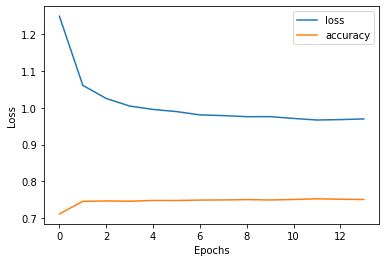

In [ ]:
# Plot. (Also known as a loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

Model-4(same as the Model-1 but with EarlyStopping callback)

In [ ]:
#set random seed.
tf.random.set_seed(42)

# This callback will stop the training when there is no improvement in the loss for two consecutive epochs.
# GOAL- Loss has to be minimized.
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', mode= 'min', patience = 2, restore_best_weights = True)

# This callback will stop the training when there is no improvement in the accuracy for two consecutive epochs.
# GOAL- Accuracy has to be maximized.
#callback = tf.keras.callbacks.EarlyStopping(monitor = 'accuracy', mode= 'max', patience = 2, restore_best_weights = True)


# Sequential Model
model4 = tf.keras.Sequential(name = 'MODEL-1')
model4.add(tf.keras.layers.Flatten(input_shape = (28,28), name = 'input_layer' ))
model4.add(tf.keras.layers.Dense(50, activation='relu', bias_regularizer = 'l1', activity_regularizer = 'l1', name = 'layer1' ))
model4.add(tf.keras.layers.Dense(25, activation = 'relu',bias_regularizer = 'l1', activity_regularizer = 'l1', name = 'layer2'))
model4.add(tf.keras.layers.Dense(15, activation= 'relu', bias_regularizer = 'l1', activity_regularizer = 'l1', name = 'layer3'))
model4.add(tf.keras.layers.Dense(10, activation = 'relu', bias_regularizer = 'l1', activity_regularizer = 'l1', name = 'output_layer'))

# Used adam as a optimization function, sparse categorical cross entropy as loss function and accuracy as metrics 
model4.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = 'accuracy')

# Fit the model with training image and traning labels.
history1 = model4.fit(train_img, train_labels, epochs = 50, callbacks = [callback])

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1002 - accuracy: 0.7065
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8230 - accuracy: 0.7623
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7688 - accuracy: 0.7739
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7386 - accuracy: 0.7883
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6974 - accuracy: 0.8188
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6604 - accuracy: 0.8362
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6415 - accuracy: 0.8409
Epoch 8/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6278 - accuracy: 0.8446
Epoch 9/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6229 - accuracy: 0.8444
Epoch 10/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.612

In [ ]:
# Evaluating the model on the test dataset.
test_loss, test_acc = model4.evaluate(test_img,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.6713 - accuracy: 0.8244

Test accuracy: 0.824400007724762


Text(0.5, 0, 'Epochs')

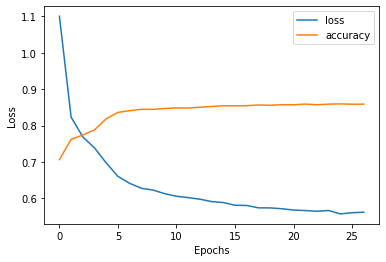

In [ ]:
# Plot. (Also known as a loss curve or training curve)
pd.DataFrame(history1.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

**Make Predcition**

With the model trained, you can use it to make predictions about some images. The model's linear outputs, logits. Attach a softmax layer to convert the logits to probabilities, which are easier to interpret.

**Logits**-- The vector of raw (non-normalized) predictions that a classification model generates, which is ordinarily then passed to a normalization function. If the model is solving a multi-class classification problem, logits typically become an input to the softmax function. The softmax function then generates a vector of (normalized) probabilities with one value for each possible class.

In addition, logits sometimes refer to the element-wise inverse of the sigmoid function.

In [ ]:
# Making a probability model
probability_model1 = tf.keras.Sequential( [model1, tf.keras.layers.Softmax()] )

In [ ]:
# Prediction by the model
predictions1 = probability_model1.predict(test_img)

In [ ]:
# See the model prediction for the first image. 
# Here, output is a probability distribution.
predictions1[0], predictions1[0].max()

(array([0.00258764, 0.00258764, 0.00258764, 0.00258764, 0.00258764,
        0.00258764, 0.00258764, 0.00258764, 0.00258764, 0.9767113 ],
       dtype=float32), 0.9767113)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. We can see which label has the highest confidence value.

In [ ]:
# Viewing the prediction label.
np.argmax(predictions1[0])

9

In [ ]:
# Viewing the true test labels.
test_labels[0]

9

**Plot Function**

In [ ]:
def plot_img(i, prediction_array, true_label, img):
    true_label , img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap = plt.cm.binary)

    predicted_label = np.argmax(prediction_array)
    
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel('{} {0.2f}% ({})'.format(class_names[predicted_label],
                                        100*np.max(prediction_array),
                                        class_names[true_label]),
                                        color = color)

In [ ]:
plot_img(i, predictions1[i], test_labels, test_img)